# Обучение без учителя
## Снижение размерности

Сегодня мы поговорим про распространенный класс задач обучения без учителя - снижение размерности. В ходе заданий мы рассмотрим примеры с цветками Ириса и рукописными цифрами MNIST.

---

## Метод главных компонент (PCA - Principal Component Analysis)
> Один из самых интуитивно простых и часто используемых методов для снижения размерности данных и проекции их на ортогональное подпространство признаков.

В совсем общем виде это можно представить как предположение о том, что все наши наблюдения скорее всего выглядят как некий эллипсоид в подпространстве нашего исходного пространства и наш новый базис в этом пространстве совпадает с осями этого эллипсоида. Это предположение позволяет одновременно избавиться от сильно скоррелированных признаков, так как вектора базиса пространства, на которое мы проецируем, будут ортогональными.

В общем случае размерность этого эллипсоида будет равна размерности исходного пространства, но наше предположение о том, что данные лежат в подпространстве меньшей размерности, позволяет отбросить "лишнее" подпространство в новой проекции, а именно то подпространство, вдоль осей которого эллипсоид будет наименее растянут. Мы будем это делать "жадно", выбирая по-очереди в качестве нового элемента базиса нашего нового подпространства последовательно ось эллипсоида из оставшихся, вдоль которой дисперсия будет максимальной.

![PCA_explane](img/pca.png)

Рассмотрим, как это делается математически:

Чтобы снизить размерность наших данных из $n$ в $ k, n \leq k $, нам нужно выбрать топ-$ k $  осей такого эллипсоида, отсортированные по убыванию по дисперсии вдоль осей.

Начнём с того, что посчитаем дисперсии и ковариации исходных признаков. Это делается просто с помощью матрицы ковариации. По определению ковариации, для двух признаков  и  их ковариация будет

$$ cov(X_i, X_j) = E[(X_i-\mu_i)(X_j-\mu_j)]=E[X_iX_j]-\mu_i\mu_j $$

где $\mu_i$ — матожидание $i$-ого признака.
При этом отметим, что ковариация симметрична и ковариация вектора с самим собой будет равна его дисперсии.

## Повторим немного про корреляцию

### Ковариация 

(ко - совместная, вариация - изменчивость). Мера **линейной** зависимости двух случайных величин.

Если ковариация положительна, то с ростом значений одной случайной величины, значения второй имеют тенденцию возрастать, а если знак отрицательный — то убывать.

$$ cov(X, Y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{x})}}{N - 1} $$
где $N$ - количество случайных величин, а единица - количество степеней свободы.

Однако только по **абсолютному** значению ковариации **нельзя судить** о том, **насколько сильно величины взаимосвязаны**, так как масштаб ковариации зависит от их дисперсий. Значение ковариации можно нормировать, поделив её на произведение среднеквадратических отклонений (квадратных корней из дисперсий) случайных величин. Полученная величина называется коэффициентом корреляции Пирсона, который всегда находится в интервале от −1 до 1:
$$ r(x, y) = \frac{cov(x, y)}{\sigma_x\sigma_y}$$

### Формула корреляции

Давайте остановимся на формуле коэффициента корреляции, которую мы получили:
$$ r(x, y) = \frac{cov(x, y)}{\sigma_x\sigma_y}$$
запишем формулу чуть подробнее и выполним возможные преобразования:

$$ r(x, y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{(N - 1)\sqrt{\sum{\frac{(x_i - \bar{x})^2}{N-1}}}\sqrt{\sum{\frac{(y_i - \bar{y})^2}{N-1}}}} $$

теперь вынесем 1/ (N - 1) из под корней 

$$ r(x, y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{(N - 1)\frac{1}{(N-1)}\sqrt{\sum{(x_i - \bar{x})^2}}\sqrt{\sum{(y_i - \bar{y})^2}}} $$

и сократим (N - 1)

$$ r(x, y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2}}\sqrt{\sum{(y_i - \bar{y})^2}}} $$

таким образом, мы сократили N - 1 в знаменателе и получили финальную формулу для коэффициента корреляции, которую вы часто сможете встретить в учебниках:

$$ r(x, y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2}\sum{(y_i - \bar{y})^2}}} $$

Таким образом матрица ковариации представляет собой симметричную матрицу, где на диагонали лежат дисперсии соответствующих признаков, а вне диагонали — ковариации соответствующих пар признаков. В матричном виде, где $X$ это матрица наблюдений, наша матрица ковариации будет выглядеть как

$$ \sum = E[(X-E[X])(X-E[X])^T] $$

У матриц как у линейных операторов есть собственные значения и собственные вектора. Когда мы нашей матрицей действуем на соответствующее линейное пространство, собственные вектора остаются на месте и лишь умножаются на соответствующие им собственные значения. То есть определяют подпространство, которое при действии этой матрицей как линейным оператором, остаётся на месте или "переходит в себя". Формально собственный вектор $ \omega_i $ с собственным значением $ \lambda_i $ для матрицы $ M $ определяется просто как $ M\omega_i=\lambda_i\omega_i $.

Матрицу ковариации для нашей выборки $ X $ можно представить в виде произведения $ X^TX $. Из отношения Релея вытекает, что максимальная вариация нашего набора данных будет достигаться вдоль собственного вектора этой матрицы, соответствующего максимальному собственному значению. Таким образом главные компоненты, на которые мы бы хотели спроецировать наши данные, являются просто собственными векторами соответствующих топ-$ k $ штук собственных значений этой матрицы.

Соответственно, для снижения размерности, надо просто умножить нашу матрицу данных на эти компоненты и мы получим проекцию наших данных в ортогональном базисе этих компонент. Теперь если мы транспонируем нашу матрицу данных и матрицу векторов главных компонент, мы восстановим исходную выборку в том пространстве, из которого мы делали проекцию на компоненты.

### Датасет
Рассматривать задачу будем на примере известного датасета **Цветки Ириса**

Датасет [Цветки Ириса](https://archive.ics.uci.edu/ml/datasets/iris) содержит 150 записей, каждая из записей содержит 4 признака, т.е. $\boldsymbol x \in \mathbb{R}^4$. 

Что за 4 признака?

0. длина чашелистника, см
1. ширина чашелистника, см
2. длина лепестка, см 
3. ширина лепестка, см 

Метки классов

0. Setosa
1. Versicolour 
2. Virginica

## Снижение размерности для набора данных по цветкам Ириса

In [2]:
# библиотека для работы с матрицами
import numpy as np

import pandas as pd

# библиотеки для визуализации
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; sns.set(style='white')
%matplotlib inline

# для генерации нормального распределения
from numpy.linalg import norm

# любимый sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn import decomposition
from sklearn.manifold import TSNE

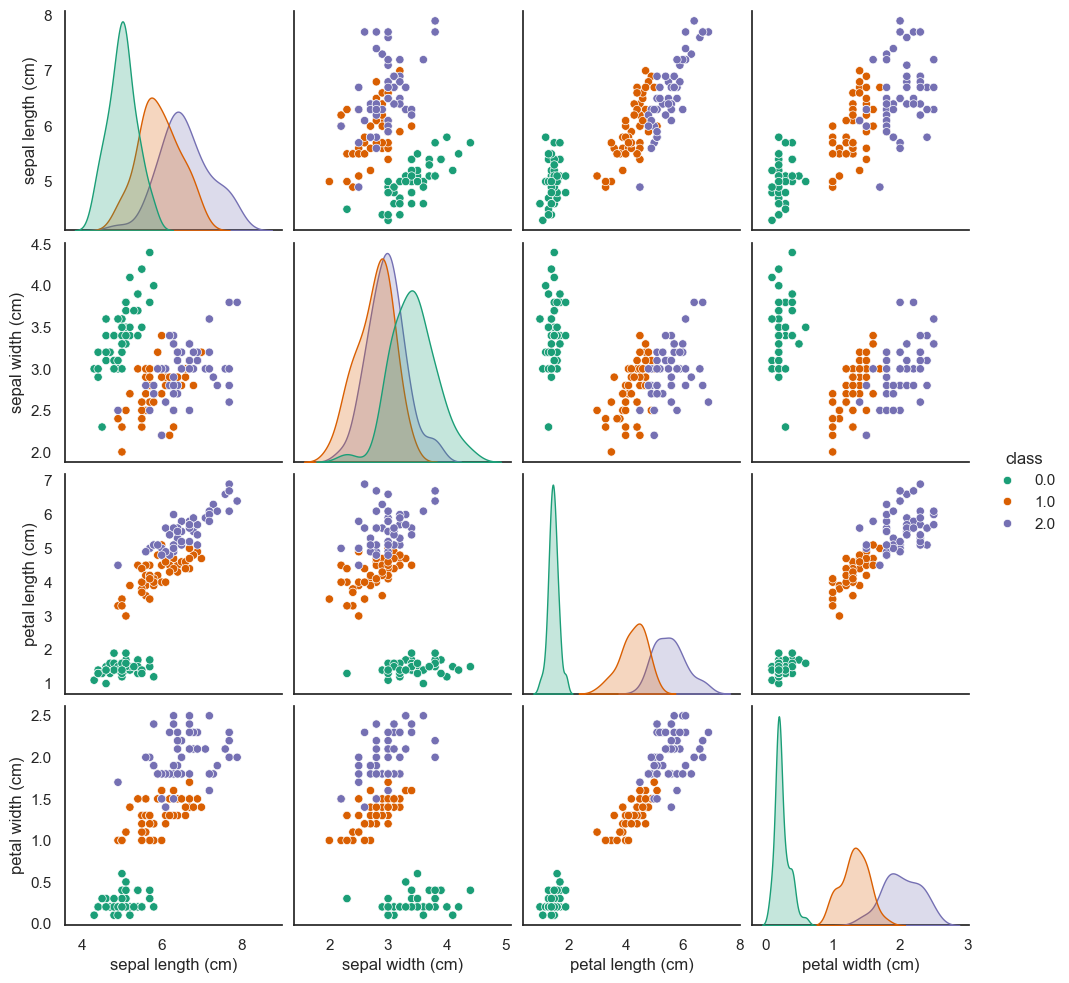

In [3]:
# загрузка данных по Ирисам
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Создадим dataframe на основании исходных данных
# для простоты отображения графиков
iris_df = pd.DataFrame(np.c_[iris.data, iris.target], columns=['sepal length (cm)', 
                                                               'sepal width (cm)', 
                                                               'petal length (cm)',
                                                               'petal width (cm)',
                                                               'class'])

# При помощи модуля seaborn.pairplot визуализируем попарные зависимости данных
# На основной диагонали показаные гистограммы распределения параметров
sns.pairplot(iris_df,hue='class',palette='Dark2');

Мы уже проговаривали, что работа с данными, размерность которых больше 2-х осложняется невозможностью визуализацией данных. Также, снижение размерности может повлиять на качество моделей, т.к. при снижении размерности мы явно теряем какую-то информацию в данных. Давайте попробуем снизить размерность данных и построить модель решающего дерева на исходном признаковом пространстве и пространстве сниженной размерности и оценим получаемые метрики.

> # Задание
>
> Разделить выборки на **train** и **test**, `test_size` = 0.3, `random_state` = 22

In [4]:
# Разделение на train и test
# type your code here
X = iris.data[:, :4] 
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

> # Задание
>
> Построить решающее дерево `max_depth` = 3 и `random_state` = 22. Посчитать метрику точности.

In [27]:
from sklearn.metrics import accuracy_score
# Построение простого дерева решений
tree = DecisionTreeClassifier(max_depth=3, random_state=22)
tree.fit(X_train, y_train)
target_predicted = tree.predict(X_test)
accuracy_score(y_test, target_predicted)

0.9666666666666667

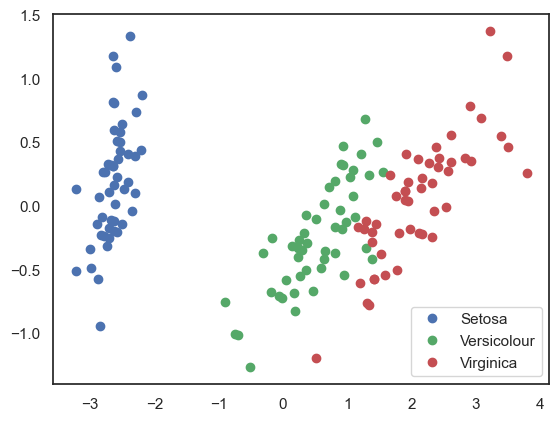

In [6]:
# Снижаем размерность при помощи sсikit-learn

# создание объекта PCA с n_components = 2
pca = decomposition.PCA(n_components=2)

# "центрируем" данные
X_centered = X - X.mean(axis=0)
# настраиваем pca
pca.fit(X_centered)
# переходим в новый ортогональный базис
X_pca = pca.transform(X_centered)

# Визуализация точек в новом пространстве меньше размерности
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

> # Задание
>
> Построить решающее дерево `max_depth` = 3 и `random_state` = 22 для данных сниженной размерности. Посчитать метрику точности. Предварительно также необходимо разделить на обучающую и тестовую выборки.

In [20]:
pca.__dict__

{'n_components': 2,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'n_features_in_': 4,
 '_fit_svd_solver': 'full',
 'mean_': array([-1.12502600e-15, -7.60872846e-16, -2.55203266e-15, -4.48530102e-16]),
 'noise_variance_': 0.05102229650818442,
 'n_samples_': 150,
 'components_': array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
        [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]]),
 'n_components_': 2,
 'explained_variance_': array([4.22824171, 0.24267075]),
 'explained_variance_ratio_': array([0.92461872, 0.05306648]),
 'singular_values_': array([25.09996044,  6.01314738])}

In [22]:
# Повторим то же самое разбиение на валидационную и тренировочную выборку.
X_train, X_test, y_train, y_test = train_test_split(X_pca, iris.target, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


> # Задание
>
> При помощи components объекта PCA для **первой компоненты** определить переменную, которая дает наибольший вклад (максимальное значение коэффициента). В поле ответа ввести название как в feature_names исходного словаря. Например, `petal width (cm)` если это четвертый признак

In [28]:
# Наиболее значимый признак
coefficients = np.abs(pca.components_[0])

# Нахождение порядкового номера переменной с наибольшим коэффициентом
max_index = np.argmax(coefficients)

print("Порядковый номер переменной с наибольшим коэффициентом:", max_index)

Порядковый номер переменной с наибольшим коэффициентом: 2


# Набор данных по рукописным цифрам

Предыдущий пример был очень модельным в том смысле, что даже при визуализации попарных scatter plot для исходных признаков мы иногда видели очень неплохое разделение классов, поэтому линейное преобразование хорошо отработало с такими данными. А что если исходный датасет сильно бОльшей размерности и более нелинейный? Теперь возьмем набор данных по рукописным цифрам MNIST.

In [30]:
# загрузим данные по цифрам
digits = datasets.load_digits()
X_mnist = digits.data
y_mnist = digits.target

Посмотрим на первые 10 цифр

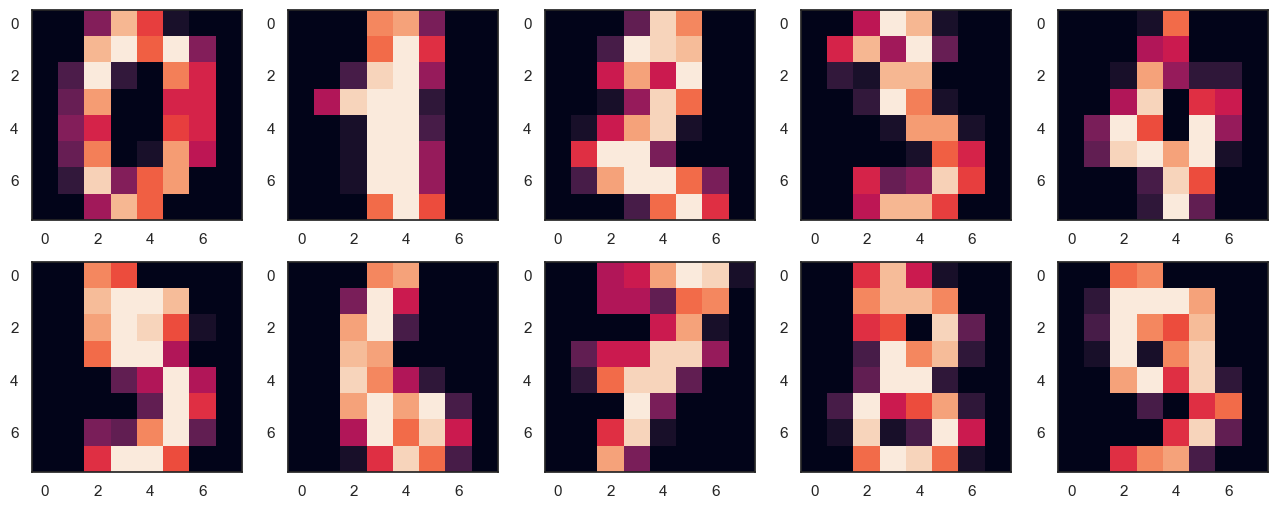

In [31]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    # при помощи функции imshow отобразим матрицы, в результате получаем визуальное отображение цифр
    plt.imshow(X_mnist[i,:].reshape([8,8]));

/tmp/ipykernel_20206/124091260.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


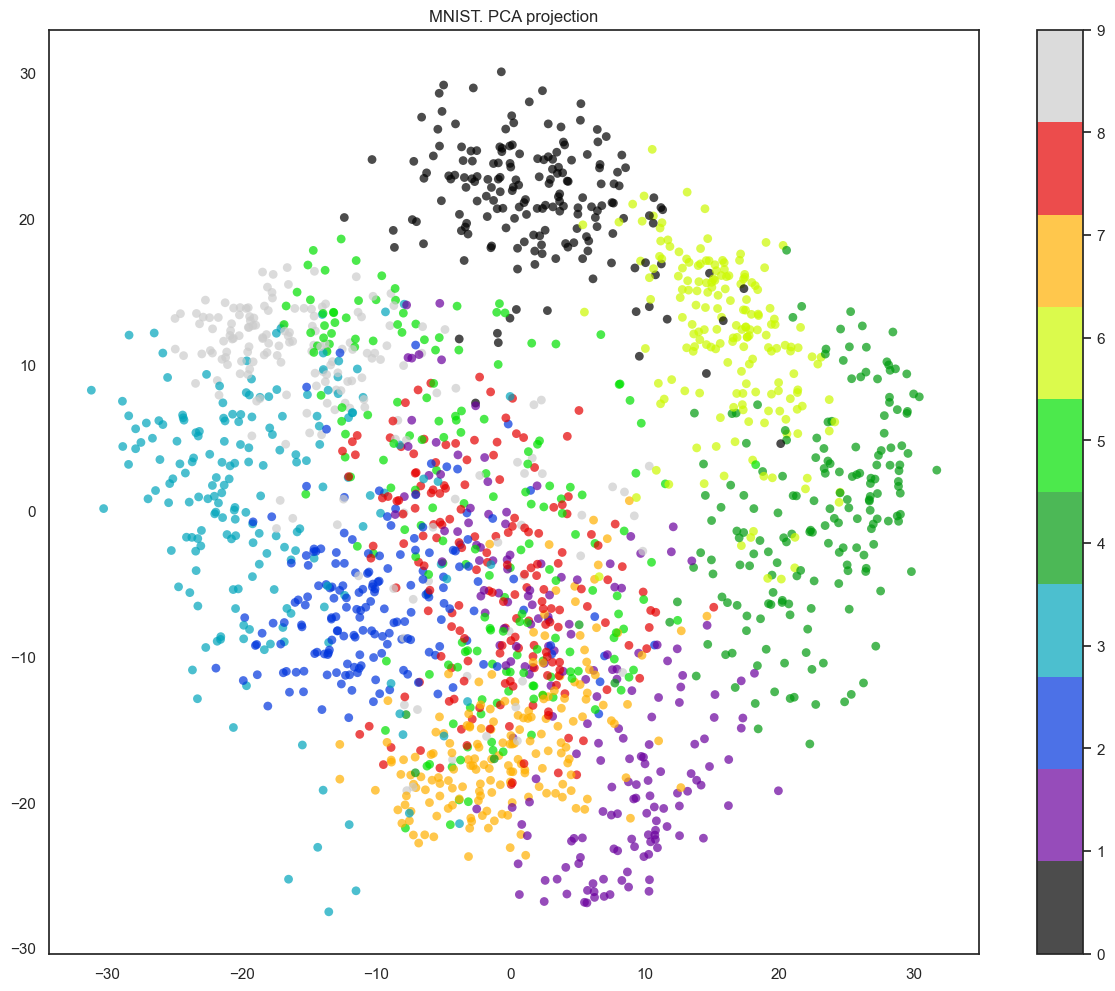

In [32]:
# вновь создадим объект PCA с n_components=2
pca_mnist = decomposition.PCA(n_components=2)
X_mnist_pca = pca_mnist.fit_transform(X_mnist)

# визуализируем результаты
plt.figure(figsize=(15,12))
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=y_mnist, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

## Количество компонент

А всегда ли можно снижать размерность до 2-х? Конечно, это было бы великолепно, если бы могли любые данные любой размерности приводить к двумеру и рабоать с упрощенной таблицей. Но конечно, данные почти никогда не обладают такой структорой, чтобы можно было увести в двумер. Для того, чтобы выбрать наиболее оптимальное количество компонент для `PCA` используют следующий подход. На практике, как правило, выбирают столько главных компонент, чтобы оставить 90% дисперсии исходных данных.

> # Задание
>
> Необходимо найти минимально достаточное количество компонент PCA для набора данных MNIST, чтобы удовлетворить условию сохранения не менее 90% дисперсии. Для решения можно создать объект `PCA` без параметра `n_componenets` и далее, анализируя свойство `explained_variance_ratio_`, получить необходимо количество компонент.

In [35]:
# Поиск количества компонент, при которых сохраняется не менее 90% дисперсии
pca_mnist_ = decomposition.PCA().fit(X_mnist)
explained_variance_ratio = pca_mnist_.explained_variance_ratio_
explained_variance_ratio

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [36]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
min_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1
print("Минимально достаточное количество компонент для сохранения не менее 90% дисперсии:", min_components)

Минимально достаточное количество компонент для сохранения не менее 90% дисперсии: 21


## t-SNE

Как мы убедились с набором MNIST, линейные преобразования PCA далеко не всегда справляются с достаточной точностью с снижением размерности. Давайте посмотрим как нелинейные вложения t-SNE отработают.

/tmp/ipykernel_20206/3936053839.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


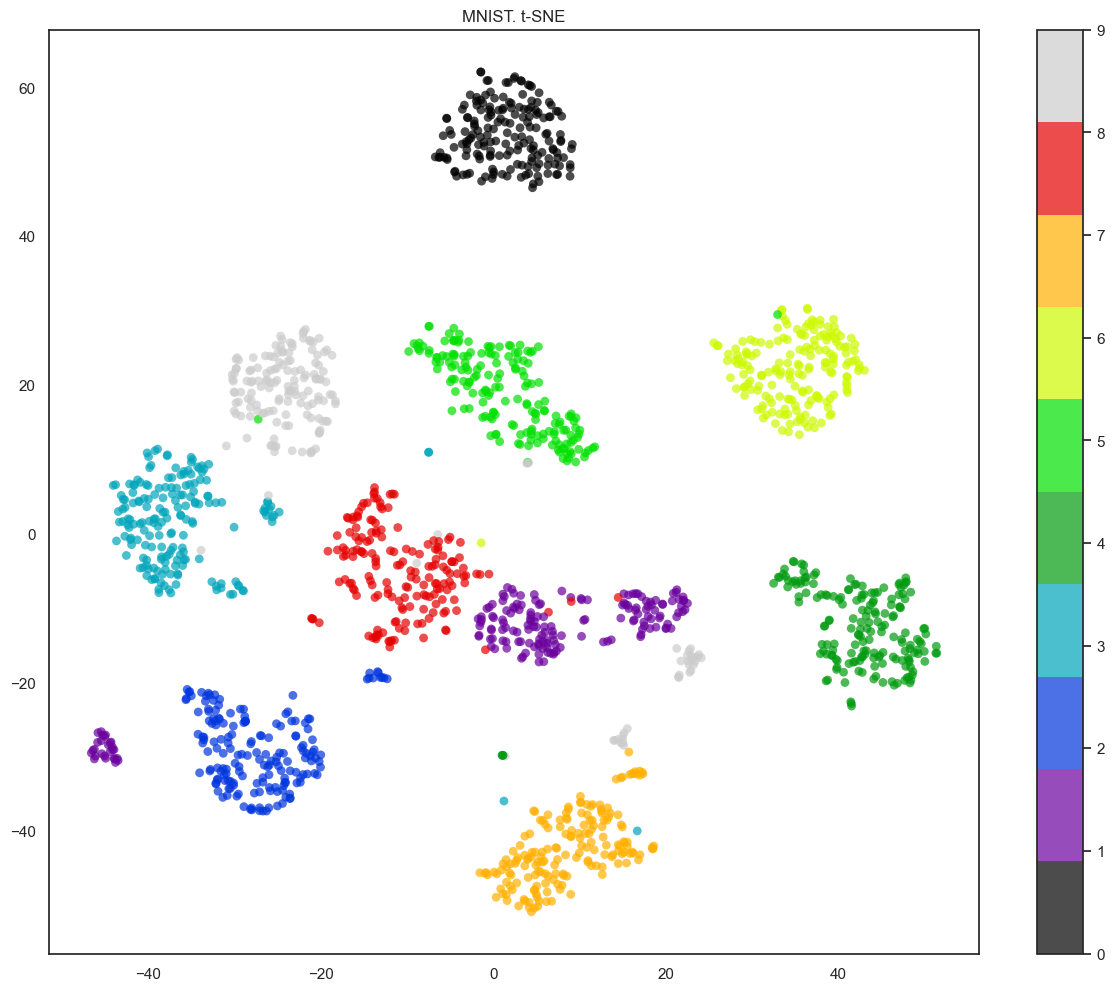

In [37]:
# Создадим объект TSNE
tSNE_mnist = TSNE(random_state=17)

# настройка модели
X_mnist_tsne = tSNE_mnist.fit_transform(X_mnist)

# визуализация данных
plt.figure(figsize=(15,12))
plt.scatter(X_mnist_tsne[:, 0], X_mnist_tsne[:, 1], c=y_mnist, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE');

## Как это работает?

Начнем с терминологии

**Точка данных** – это точка $ x_i $ в исходном пространстве данных $ R^D $, где D – **размерность** пространства данных. Каждая точка данных – это изображение рукописной цифры. 

**Точка отображения** – это точка $ y_i $ в пространстве отображения $ R^2 $. Это пространство будет содержать целевое представление набора данных. 

Как нам выбрать расположение точек отображения? Мы хотим сохранить структуру данных. Более конкретно, если две точки данных расположены близко друг к другу, мы хотим, чтобы две соответствующие точки отображения также располагались близко друг к другу. Пусть $ |x_i — x_j|^2 $ – евклидово расстояние между двумя точками данных, а $ |y_i — y_j|^2 $ – расстояние между точками отображения. Сначала определим *условное сходство* для двух точек данных:

$$ p_{j|i} = \frac{exp(\frac{-|x_i-x_j|^2}{2{\sigma_{i}}^2})}{\sum_{k\neq i}exp(\frac{-|x_i-x_k|^2}{2{\sigma_{i}}^2})} $$

Это выражение показывает, насколько точка $ x_j $ близка к $ x_i $, при гауссовом распределении вокруг $ x_i $ с заданной дисперсией $ {\sigma_{i}}^2 $. Дисперсия различна для каждой точки. Она выбирается таким образом, чтобы точки, расположенные в областях с большой плотностью, имели меньшую дисперсию, чем точки, расположенные в областях с малой плотностью.

Теперь определим сходство, как симметричный вариант условного сходства:

$$ p_{ij} = \frac{p_{j|i}+p_{i|j}}{2N} $$

Получаем **матрицу сходства** для исходного набора данных. Как же выглядит эта матрица?

### Матрица сходства

$$ q_{ij} = \frac{f(|x_i-x_j|)}{\sum_{k \neq i}f(|x_i-x_k|)} \ \ \ , где \ f(z) = \frac{1}{1+z^2} $$

Здесь применяется такой же подход, как и для точек данных, но используется **распределение Стьюдента с одной степенью свободы** или **распределение Коши** вместо **нормального распределения**.

В то время как матрица сходства для данных $ p_{ij} $ является постоянной, матрица сходства для отображения $ q_{ij} $ зависит от точек отображения. Нам необходимо сохранить структуру данных, т.е. чтобы близкие точки данных превращались в близкие точки отображения и наоборот.

---

## Алгоритм

Логика алгоритма соответствует минимизации расстояния Кульбака-Лейблера (Kullback-Leibler divergence) между двумя распределениями $ p_{ij} $ и $ q_{ij} $:

$$ KL(P||Q) = \sum_{i,j}p_{ij}log_{q_{ij}}^{p_{ij}} $$

Данная формула выражает расстояние между двумя матрицами сходства.

Чтобы минимизировать эту величину, применим **градиентный спуск (gradient descent)**. Градиент может быть вычислен аналитически:

$$ \frac{\partial KL(P||Q)}{\partial y_{i}} = 4 \sum_{j}(p_{ij}-q_{ij})g(|x_{i}-x_{j}|)u_{ij} \ \ \ \ , где \ g(z)=\frac{z}{1+z^2} $$

$ u_{ij} $ – единичный вектор, идущий от $ y_{j} $ к $ y_{i} $. 

---

## Почему распределение Стьюдента?

Теперь объясним, почему для точек отображения было выбрано распределение Стьюдента, в то время как для точек данных применяется нормальное распределение. Известно, что объем $ N $-мерного шара радиуса $ r $ пропорционален $ r^N $. При больших $ N $, если выбирать случайные точки в шаре, большинство точек будет располагаться около поверхности, и очень небольшое количество – около центра.

Моделирование, реализованное ниже, демонстрирует распределение расстояний для этих точек при различном количестве измерений.

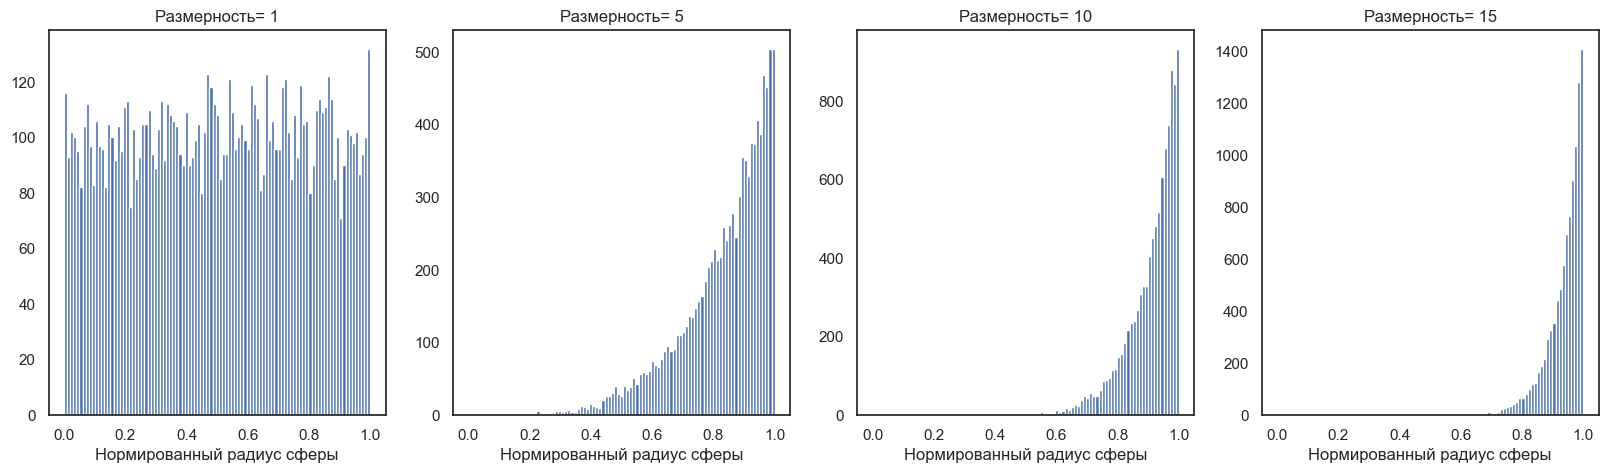

In [38]:
npoints = 10000
plt.figure(figsize=(20, 5))

for i, D in enumerate([1,5,10,15]):
    # нормальное распределение
    u = np.random.randn(npoints, D)
    # положение на сфере
    u /= norm(u, axis=1)[:, None]
    # посмотрим относительно радиуса
    r = np.random.rand(npoints, 1)
    points = u * r**(1./D)
    
    # визуализируем расстояние от центра
    ax = plt.subplot(1, 4, i+1)
    ax.set_xlabel('Нормированный радиус сферы')
    ax.hist(norm(points, axis=1),
            bins=np.linspace(0, 1, 100))
    ax.set_title(f'Размерность= {D}', loc='center')

При уменьшении размерности набора данных, если использовать гауссово распределение для точек данных и точек отображения, мы получим дисбаланс в распределении расстояний для соседей точек. Это объясняется тем, что распределение расстояний существенно отличается для пространства большой размерности и для пространства малой размерности. Тем не менее, алгоритм пытается воспроизвести одинаковые расстояния в обоих пространствах. Этот дисбаланс создает избыток сил притяжения, что иногда приводит к неудачному отображению. Данный недостаток действительно присутствовал в первоначальном алгоритме `SNE`, разработанном **Хинтоном и Ровейсом (Roweis) и опубликованном в 2002 году**.

Алгоритм `t-SNE` решает эту проблему, используя распределение Стьюдента с одной степенью свободы (или распределение Коши) для точек отображения. В отличие от гауссова распределения, это распределение имеет значительно более «тяжелый» хвост, что позволяет компенсировать дисбаланс. Для данного сходства между двумя точками данных, две соответствующие точки отображения должны находиться намного дальше друг от друга, чтобы их сходство соответствовало сходству точек данных. Это можно увидеть на следующем графике.

In [ ]:
plt.figure(figsize=(12, 5))
x = np.linspace(0., 10., 1000)
gauss = np.exp(-x**2)
cauchy = 1/(1+x**2)
plt.plot(x, gauss, label='Нормальное распределение');
plt.plot(x, cauchy, label='Распределение Коши');
plt.grid(color='black', linestyle='-', linewidth=0.2)
plt.legend();

> # Задание
>
> Построить алгоритм классификации для решения задачи классификации MNIST. Обучить модель на исходных данных и далее на данных, которые получатся после снижения размерности при помощи PCA и t-SNE. Какой алгоритм снижения дает лучшие метрики? Оцените, какое количество времени требуется для препроцессингом PCA и t-SNE.